### This dataset contains over 20,000 anonymised reviews of McDonald's stores in the United States, scraped from Google reviews. It provides valuable insights into customer experiences and opinions about various McDonald's locations across the country.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from ydata_profiling import ProfileReport
import missingno as msno

# Folium
import folium

# Text Analytics

# Regular Expressions - lets us precicely manipulate strings
import re

# Let's use create a Word Cloud visualisation
from wordcloud import WordCloud

# An NLP library
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Natural language toolkit - another NLP library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Print results nicely
from pprint import pprint

# Visulalisation library for our LDA analysis
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()

# If you want to save the visualisation data
import pickle 

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

import statistics

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Hyperparameters
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ariel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# pip install ydata-profiling

In [2]:
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 2127: invalid start byte

df = pd.read_csv('McDonald_s_Reviews.csv', encoding='iso-8859-1')

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

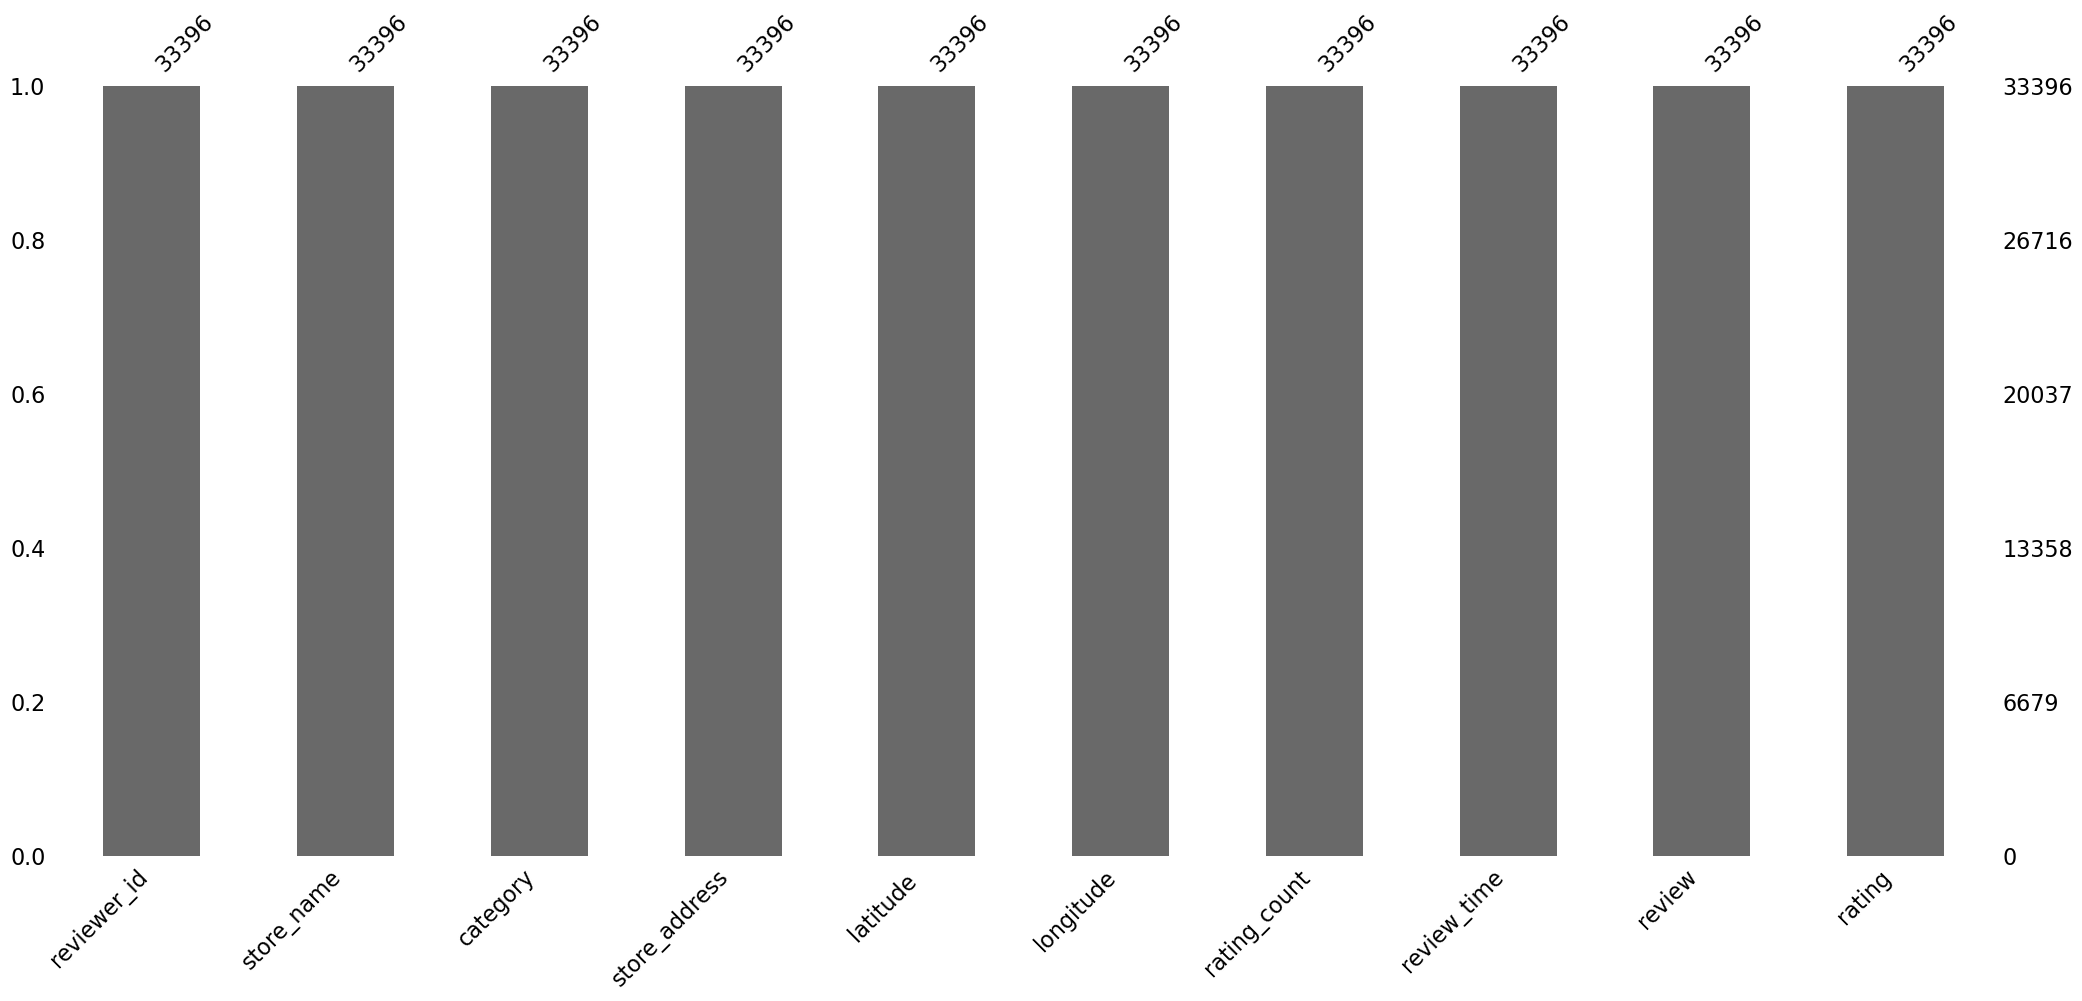

In [3]:
ax = msno.bar(df)

In [4]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [5]:
df.tail()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars
33395,33396,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",2 years ago,they took good care of me,5 stars


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       33396 non-null  float64
 5   longitude      33396 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [7]:
# extra space in the column 'latitude'
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

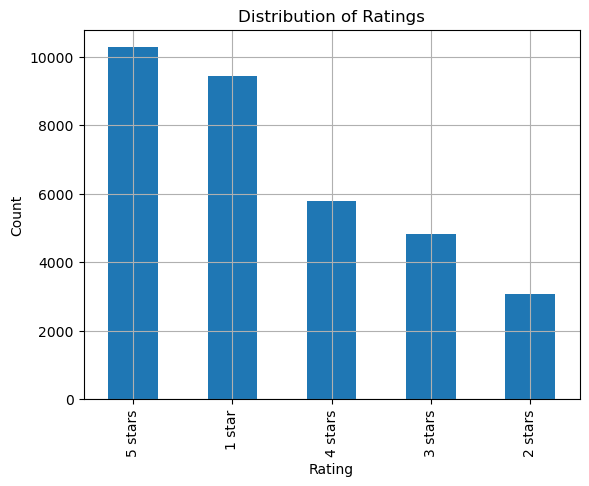

In [9]:
# Rating Distribution
df['rating'].value_counts().plot(kind='bar', grid=True)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show();

### Selecting features for Folium Map

In [10]:
locations = df.copy()

In [11]:
locations = locations[['store_address','latitude','longitude']]
locations

,store_address,latitude,longitude
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874
...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098


In [12]:
# Deleted Duplicate Locations
locations.drop_duplicates(inplace=True)

In [13]:
locations

,store_address,latitude,longitude
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874
800,"1698 US-209, Brodheadsville, PA 18322, United ...",40.922081,-75.399919
1828,"72-69 Kissena Blvd, Queens, NY 11367, United S...",40.727401,-73.812460
2968,"429 7th Ave, New York, NY 10001, United States",40.750506,-73.990583
4108,"724 Broadway, New York, NY 10003, United States",40.729126,-73.993264
5248,"160 Broadway, New York, NY 10038, United States",40.709375,-74.009979
5251,"555 13th St NW, Washington, DC 20004, United S...",38.896980,-77.028913
5254,"10451 Santa Monica Blvd, Los Angeles, CA 90025...",34.056593,-118.426000
5257,"114 Delancey St, New York, NY 10002, United St...",40.718838,-73.988280
5260,"5920 Balboa Ave, San Diego, CA 92111, United S...",32.820654,-117.178011


In [14]:
locations.duplicated().sum()

0

## Folium Map

In [15]:
coordinates = {'latitude': [30.460718, 40.922081, 40.727401, 40.750506, 40.729126, 40.709375, 38.896980, 34.056593,
                         40.718838, 32.820654, 40.718514, 40.752529, 37.385495, 28.399986, 40.759057, 38.905456,
                         40.750831, 34.035270, 25.790295, 32.797661, 44.981410, 33.931261, 34.012219, 28.450387,
                         29.676267, 41.879656, 30.329135, 34.152507, 39.852059, 33.009318, 40.771910, 32.958041,
                         36.090244, 21.274680, 28.333508, 28.655350, 28.423814, 38.812823, 32.744596, 25.810000],
              'longitude': [-97.792874, -75.399919, -73.812460, -73.990583, -73.993264, -74.009979, -77.028913,
                            -118.426000, -73.988280, -117.178011, -74.001168, -73.992876, -121.995421, -81.405103,
                            -111.897383, -77.044235, -73.989096, -118.238206, -80.132077, -117.249470, -73.459820,
                            -118.282955, -118.494540, -81.471414, -98.634580, -87.777913, -97.660629, -118.367904,
                            -74.981099, -97.222925, -74.161475, -97.307652, -115.175822, -157.824120, -81.513738,
                            -81.342692, -81.461242, -77.185055, -96.812286, -80.189098],
              'store address': ['13749 US-183 Hwy, Austin, TX 78750', '1698 US-209, Brodheadsville, PA 18322',
                                '72-69 Kissena Blvd, Queens, NY 11367','429 7th Ave, New York, NY 10001',
                                '724 Broadway, New York, NY 10003','160 Broadway, New York, NY 10038',
                                '555 13th St NW, Washington, DC 20004','10451 Santa Monica Blvd, Los Angeles, CA 90025',
                                '114 Delancey St, New York, NY 10002','5920 Balboa Ave, San Diego, CA 92111',
                                '262 Canal St, New York, NY 10013','490 8th Ave, New York, NY 10001',
                                '550 Lawrence Expy, Sunnyvale, CA 94086','11382 US-441, Orlando, FL 32837',
                                '210 5th S, Salt Lake City, UT 84106','1916 M St NW, Washington, DC 20036',
                                '151 West 34th Street (Macy\'s 7th Floor, New York, NY 10001',
                                '690 Alameda St, Los Angeles, CA 90021','1650 Washington Ave, Miami Beach, FL 33139',
                                '1121 Garnet Ave, San Diego, CA 92109','1044 US-11, Champlain, NY 12919',
                                '501 W Imperial Hwy, Los Angeles, CA 90044','1540 2nd St, Santa Monica, CA 90405',
                                '6875 Sand Lake Rd, Orlando, FL 32819','25200 I-10 Lot 2, San Antonio, TX 78257',
                                '111 Madison St, Oak Park, IL 60302','8500 US-290, Austin, TX 78724',
                                '10901 Riverside Dr, North Hollywood, CA 91602',
                                '702-2 Haddonfield-Berlin Rd, Voorhees Township, NJ 08043',
                                '1100 N US Hwy 377, Roanoke, TX 76262','621 Broadway, Newark, NJ 07104',
                                '2400 Alliance Gateway Fwy, Fort Worth, TX 76177',
                                'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119',
                                '2476 Kalakaua Ave, Honolulu, HI 96815', 
                                '5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746',
                                '1415 E State Rd, Fern Park, FL 32730','9814 International Dr, Orlando, FL 32819',
                                '7010 Bradlick Shopping Center, Annandale, VA 22003',
                                '632 S R L Thornton Freeway Service Rd, Dallas, TX 75203',
                                '3501 Biscayne Blvd, Miami, FL 33137']}

locations = pd.DataFrame(coordinates)

# Create Map
Branches = folium.Map(location=[locations['latitude'].iloc[1], locations['longitude'].iloc[2]],
               min_zoom=3, max_zoom=19,zoom_start=2)

for index, row in locations.iterrows():
    folium.Marker([row['latitude'], row['longitude']], tooltip=row['store address'], 
                  icon=folium.Icon(color='red', icon='star')).add_to(Branches)
    
Branches.save("footprint.html")


Branches

# LDA (Latent Dirichlet Allocation)

In [17]:
# Reviews: 33,396
reviews_list = df['review']
reviews_list

0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                             The service is very good
33393                           To remove hunger is enough
33394    It's good, but lately it has become very expen...
33395                            they took good care of me
Name: review, Length: 33396, dtype: object

In [18]:
# Checking for duplicate values
reviews_list.duplicated().sum()

11111

In [19]:
# Drop Dplicate values
# Reviews: 22,285
reviews_list.drop_duplicates(inplace=True)
reviews_list

0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                             The service is very good
33393                           To remove hunger is enough
33394    It's good, but lately it has become very expen...
33395                            they took good care of me
Name: review, Length: 22285, dtype: object

In [20]:
reviews_list.duplicated().sum()

0

In [21]:
reviews_list.tolist()

['Why does it look like someone spit on my food?\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.',
 "It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",
 'Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day  and the manager told me she wasnï¿',
 'My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿

In [22]:
df_reviews = pd.DataFrame({'Reviews': reviews_list})

df_reviews.head()

,Reviews
0,Why does it look like someone spit on my food?...
1,It'd McDonalds. It is what it is as far as the...
2,Made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4,"I repeat my order 3 times in the drive thru, a..."


# Word Cloud

In [23]:
long_string = ','.join(reviews_list)
len(long_string)

3271391

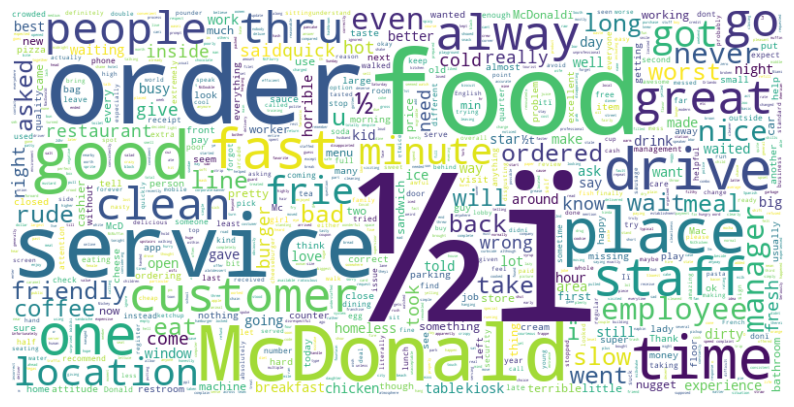

In [24]:
import warnings
warnings.filterwarnings('ignore')

wordcloud = WordCloud(
    background_color='white',
    max_words=5000,
    collocations=False,
    width=800,  
    height=400)

wordcloud.generate(long_string)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Preparation
Removing Stopwords

In [25]:
# Get our stop words, like 'and' and 'on'
stop_words = stopwords.words('english')

In [26]:
# Helper function to turn our sentences into a list of words
# Yeild means that it returns a generator function ie it won't run all at once, but only as needed
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [27]:
# Helper function to remove stopwords
def remove_stopwords(texts, stopwords=stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [28]:
# Lsit of words
words = list(sent_to_words(reviews_list))

In [29]:
words = remove_stopwords(words) 

In [30]:
len(words)

22285

In [31]:
words[0]

['look',
 'like',
 'someone',
 'spit',
 'food',
 'normal',
 'transaction',
 'everyone',
 'chill',
 'polite',
 'dont',
 'want',
 'eat',
 'im',
 'trying',
 'think',
 'milky',
 'white',
 'clear',
 'substance',
 'food',
 'sure',
 'coming',
 'back']

## Tranasform into features

In [32]:
# Make a dictionary of ids for the words
id2word = corpora.Dictionary(words)
id2word

In [33]:
# Translates our words into their correspoinding ids
# Translate all of our words to an ID
# bag of words
corpus = [id2word.doc2bow(text) for text in words]

In [34]:
len(corpus)

22285

In [35]:
# Based on 'expert knowledge'
num_topics = 20

In [36]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=42)

In [37]:
pprint(lda_model.print_topics())

[(0,
  '0.023*"food" + 0.018*"order" + 0.017*"place" + 0.014*"get" + '
  '0.011*"mcdonald" + 0.010*"½i" + 0.010*"fast" + 0.008*"service" + '
  '0.007*"always" + 0.007*"staff"'),
 (1,
  '0.022*"order" + 0.019*"drive" + 0.015*"place" + 0.014*"food" + 0.014*"thru" '
  '+ 0.011*"mcdonald" + 0.011*"one" + 0.010*"service" + 0.009*"clean" + '
  '0.008*"fast"'),
 (2,
  '0.016*"drive" + 0.012*"thru" + 0.011*"get" + 0.011*"mcdonald" + '
  '0.011*"staff" + 0.010*"order" + 0.009*"food" + 0.008*"time" + '
  '0.008*"people" + 0.008*"like"'),
 (3,
  '0.024*"food" + 0.023*"mcdonald" + 0.017*"fast" + 0.012*"½i" + 0.012*"get" + '
  '0.011*"order" + 0.010*"go" + 0.010*"always" + 0.009*"service" + '
  '0.009*"good"'),
 (4,
  '0.034*"food" + 0.027*"good" + 0.014*"clean" + 0.013*"service" + '
  '0.013*"mcdonald" + 0.009*"order" + 0.009*"like" + 0.008*"get" + '
  '0.008*"place" + 0.007*"staff"'),
 (5,
  '0.462*"½i" + 0.010*"order" + 0.010*"food" + 0.007*"place" + 0.007*"service" '
  '+ 0.006*"good" + 0.005*"

In [38]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [39]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [40]:
# How often this topics appear
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.216607 -0.002278       1        1  14.417617
12    -0.048376  0.014799       2        1  10.662951
5      0.203514 -0.000315       3        1   9.218362
9     -0.048843 -0.006475       4        1   6.332900
7     -0.042744  0.018216       5        1   5.887053
1     -0.042735 -0.006313       6        1   5.819058
11    -0.049138  0.002369       7        1   4.829934
16    -0.024756  0.039787       8        1   4.760931
2     -0.053066 -0.013907       9        1   4.752374
0     -0.031375 -0.007760      10        1   4.697108
8     -0.046240  0.016206      11        1   4.112775
4     -0.047134  0.019679      12        1   3.632356
3     -0.037331  0.025517      13        1   3.321227
15    -0.007146 -0.006156      14        1   2.892717
17    -0.062233  0.005659      15        1   2.852860
6      0.162653 -0.008758      16        1   2.741838
18    -0.058005  0.011864      17        1   2.568186
10    -0.043818 -0.010130      18        1   2.313890
14    -0.065820 -0.092717      19        1   2.191286
13     0.125986  0.000714      20        1   1.994579, topic_info=         Term          Freq         Total Category  logprob  loglift
71         ½i  46035.000000  46035.000000  Default  30.0000  30.0000
7        food   6339.000000   6339.000000  Default  29.0000  29.0000
542      good   3344.000000   3344.000000  Default  28.0000  28.0000
420  mcdonald   3547.000000   3547.000000  Default  27.0000  27.0000
78    service   4829.000000   4829.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
30   friendly     21.164716   1188.334827  Topic20  -5.8083  -0.1132
83      drive     24.629141   2525.060881  Topic20  -5.6567  -0.7154
142   ordered     19.456771   1135.334259  Topic20  -5.8924  -0.1518
218    really     18.246108    869.043924  Topic20  -5.9567   0.0513
88      fries     18.974964   1542.514479  Topic20  -5.9175  -0.4833

[1688 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
12062     14  0.490408   abrupt
3767       9  0.306074   absurd
3767      13  0.612148   absurd
8675      10  0.459411  abusing
8675      13  0.229706  abusing
...      ...       ...      ...
1035       1  0.381914      ½ve
1035       3  0.501262      ½ve
1035      10  0.011935      ½ve
1035      16  0.071609      ½ve
1035      20  0.023870      ½ve

[5902 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 13, 6, 10, 8, 2, 12, 17, 3, 1, 9, 5, 4, 16, 18, 7, 19, 11, 15, 14])

## Removing more unwanted words/characters

In [41]:
# Adding more stop words based on 'expert knowledge' and some data exploration
stop_words.extend(['½i','ï'])

In [42]:
# Remove punctuation
df_reviews['processed_text'] = df_reviews['Reviews'].map(lambda x: re.sub('[,\\.!?]', '', x))
# Convert the titles to lowercase
df_reviews['processed_text'] = df_reviews['processed_text'].map(lambda x: x.lower())

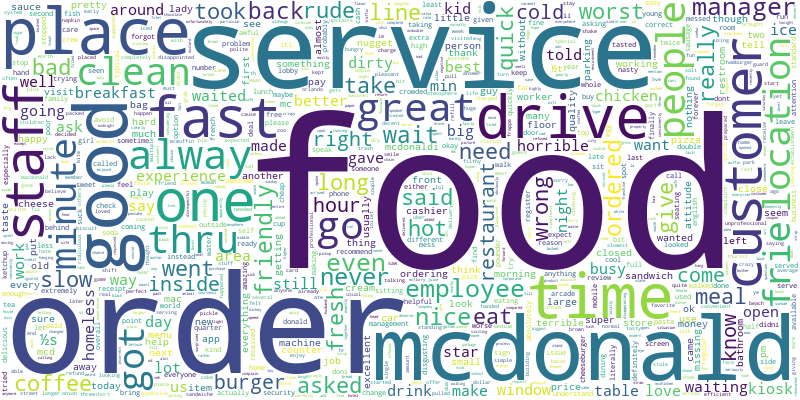

In [43]:
texts = df_reviews['processed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

# Processing for the word cloud (remember it needs one long string)
long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue',
                      collocations=False,
                      width=800,
                      height=400)

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [44]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
    
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.048807  0.042638       1        1  9.651261
1      0.002272  0.015390       2        1  9.003327
13     0.001533  0.012969       3        1  8.392051
8      0.013563  0.014313       4        1  6.241989
4      0.011860  0.010944       5        1  6.094430
15    -0.018435  0.029711       6        1  5.350173
10    -0.005586 -0.005714       7        1  5.337959
0     -0.062128 -0.000327       8        1  4.930642
6     -0.008720  0.025575       9        1  4.725101
18    -0.012194 -0.013772      10        1  4.183759
16     0.008600  0.010810      11        1  4.130673
3     -0.001451 -0.008648      12        1  4.117015
5     -0.005780 -0.004108      13        1  3.944263
12    -0.002482  0.026725      14        1  3.882059
11    -0.012276 -0.032605      15        1  3.704062
9      0.022501 -0.024995      16        1  3.489232
2     -0.001498 -0.022001      17        1  3.432664
17     0.024629  0.000169      18        1  3.371439
19    -0.047355 -0.016995      19        1  3.236593
7      0.044140 -0.060079      20        1  2.781310, topic_info=         Term         Freq        Total Category  logprob  loglift
419  mcdonald  3339.000000  3339.000000  Default  30.0000  30.0000
77    service  4650.000000  4650.000000  Default  29.0000  29.0000
7        food  6051.000000  6051.000000  Default  28.0000  28.0000
58      order  4422.000000  4422.000000  Default  27.0000  27.0000
541      good  3118.000000  3118.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
217    really    28.298373   805.089118  Topic20  -5.6627   0.2341
158      time    37.975673  1972.353846  Topic20  -5.3685  -0.3678
9        like    35.087379  1931.106856  Topic20  -5.4477  -0.4258
24     always    32.785955  1799.206223  Topic20  -5.5155  -0.4229
58      order    34.503242  4422.168410  Topic20  -5.4644  -1.2711

[1711 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1560     16  0.518908   abscent
3670      3  0.116431  accident
3670      4  0.465725  accident
3670      8  0.232862  accident
3670     10  0.116431  accident
...     ...       ...       ...
468      18  0.011365        ½t
468      19  0.022729        ½t
468      20  0.013638        ½t
4300      1  0.216732      ½you
4300      8  0.433463      ½you

[6052 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 2, 14, 9, 5, 16, 11, 1, 7, 19, 17, 4, 6, 13, 12, 10, 3, 18, 20, 8])

In [45]:
# Adding our predicted topic (based on highest affinity score) and the corresponding score to the dataframe
predicted_topics = []
predicted_scores = []

for word in words:
    # Gets the predicted topics for a given document
    pred_topics = lda_model.get_document_topics(id2word.doc2bow(word), minimum_probability=None)
    # Sort the predicted topics by max score
    pred_topics.sort(reverse=True, key=lambda x: x[1])
    # Add the topic and socre to their respective lists
    predicted_topics.append(pred_topics[0][0])
    predicted_scores.append(pred_topics[0][1])
df_reviews['predicted_topic'] = predicted_topics
df_reviews['predicted_score'] = predicted_scores

In [46]:
# Top 10 predicted scores
top10_scores = df_reviews.sort_values(by='predicted_score',ascending=False).head(10)
top10_scores

,Reviews,processed_text,predicted_topic,predicted_score
25371,"So, I got to this location frequently, despite...",so i got to this location frequently despite h...,19,0.994023
25963,"Biscayne Blvd., and 35th Street\nBased upon wh...",biscayne blvd and 35th street\nbased upon what...,13,0.993425
14661,"Just to preface, I'm not a McDonald's regular ...",just to preface i'm not a mcdonald's regular s...,1,0.993205
8680,PLAN TO BE UNWELCOMED!!! 15 Mar 2020 p.m.\nI e...,plan to be unwelcomed 15 mar 2020 pm\ni expect...,8,0.993146
13044,If we focus too much on ourselves and the trou...,if we focus too much on ourselves and the trou...,3,0.992943
13971,"Very nice staff, but the reason Iï¿½ï¿½ï¿½ï¿½ï...",very nice staff but the reason iï¿½ï¿½ï¿½ï¿½ï¿...,5,0.992138
17315,I went to the McD's on Rt 561 at (Roughly) 21:...,i went to the mcd's on rt 561 at (roughly) 21:...,10,0.991801
21,Meh.. just meh. When I finally get the correct...,meh just meh when i finally get the correct or...,4,0.991731
14697,I just stopped at this McDonaldï¿½ï¿½ï¿½ï¿½ï¿½...,i just stopped at this mcdonaldï¿½ï¿½ï¿½ï¿½ï¿½...,0,0.991351
14065,Mobile ordered food and waiting about 30 minut...,mobile ordered food and waiting about 30 minut...,13,0.990769


# Sentiment Analysis
Valance Aware Dictionary sEntiment Reasoner

In [47]:
sia = SentimentIntensityAnalyzer()

In [48]:
reviews_sentiment = df_reviews

In [49]:
def compound_score(processsed_text):
    scores = [sia.polarity_scores(sentence)['compound'] for sentence in nltk.sent_tokenize(processsed_text)]
    if (len(scores) < 1):
        print(processsed_text)
    return statistics.mean(scores)

In [50]:
# Random Review
print('Random Review:\n\n',reviews_sentiment['processed_text'][70],'\n')

print('Compound Score:',compound_score(reviews_sentiment['processed_text'][70]))

Random Review:

 customer  service  is no good the staff  play games  as if i'm there to pay my money  to see them horsing around and the the management  are a jock don't answer  the phone  to night is september 29 2021 at 10:30pm my next  visit to austin will not be to a mcdonald's 

Compound Score: 0.4019


In [51]:
reviews_sentiment['Compound Score'] = [compound_score(text) for text in reviews_sentiment['Reviews']]

## Top 10 Positive Sentiment

In [52]:
reviews_sentiment.nlargest(10, 'Compound Score')[['processed_text', 'Compound Score']]

,processed_text,Compound Score
145,understand mcdonald's is under construction bu...,0.9913
14087,awesome food awesome recipe awesome workers gr...,0.9908
8952,super quick super clean super friendly staff l...,0.9888
14222,great place great service great restaurant gre...,0.9868
17279,the manager ikea is awesome she provides great...,0.9844
10224,good morning how are you the court orders as h...,0.9833
100,i love going to mcdonald's in that area becaus...,0.9773
8638,where do i start in the past and present they ...,0.9764
11304,donald's app is the app that keeps on giving a...,0.9763
23802,good morning outstanding service the coffee wa...,0.9756


## The most positive Reviews

In [53]:
for row in reviews_sentiment.sort_values('Compound Score', ascending=False).iloc[:10]['processed_text']:
    print(row)
    print('**************************************************************************************************************')

understand mcdonald's is under construction but it is doing well with its service as it's going right now i still recommend going to mcdonald's is still fast service and still great awesome food and the kids love it still so as soon as they're done with the remodeling as soon as they are they are they're all right all day all ready to go back to work i recommend this in my community and community sure does love this and leander texas
**************************************************************************************************************
awesome food awesome recipe awesome workers great head manager great cleaning services great breakfast great pancakes we love mcdonalds awesome place
**************************************************************************************************************
super quick super clean super friendly staff love this restaurant the children's area is always clean great prices great location in don't have one negative thing to say about this mcdonald'

## Top 10 Negative Sentiment

In [54]:
reviews_sentiment.nsmallest(10, 'Compound Score')[['processed_text', 'Compound Score']]

,processed_text,Compound Score
2331,there food is disgusting they don't clean and ...,-0.9885
7079,very bad but very bad at night the workers clo...,-0.9736
10473,windows service very bad rude no wear gloves t...,-0.9697
19469,very bad bad bad bad i mean very bad service,-0.9636
21143,the worst customer service ever drive-thru hor...,-0.9571
8903,if any mcdonald's could get an order right i w...,-0.9565
3604,i was very bad there at 4:45 and the attention...,-0.9554
21521,the worst of the worst i just drive by mcdonal...,-0.9552
19166,they stole my car i went in forgot my wallet w...,-0.9501
9101,worst experience i have ever had i waited over...,-0.9485


## The most negative Reviews

In [55]:
for row in reviews_sentiment.sort_values('Compound Score', ascending=True).iloc[:10]['processed_text']:
    print(row)
    print('**************************************************************************************************************')

there food is disgusting they don't clean and the food is made out of spiders that place is the worst worst worst worst worst worst worst place i've ever been before
**************************************************************************************************************
very bad but very bad at night the workers close everything and it's 24 hours the other day ask what time they close and he said the supervisor never closes it's 24 hours surprise he told me he didn't know why they closed until i saw that the manager  one day i get to work and that day they did not close what a coincidence hahahaha very bad these guys put yellow cones at the entrance of the car service woouuuu that bad and that is everyday woouuuu that bad
**************************************************************************************************************
windows service very bad rude no wear gloves touch food soda everything also rude to complain customer need wear gloves so bad experience very rude lad

### Sentiment score based on the Reviews' positivity, negativity, and neutrality.

In [56]:
# Sentiment Analysis based on 22,285 Reviews
reviews_sentiment['processed_text'].count()

22285

In [57]:
# Example
sia.polarity_scores("Good Morning")

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [58]:
# Performing sentiment analysis on each review
sentiments = []
for review in reviews_sentiment['processed_text']:
    sentiment = sia.polarity_scores(review)
    sentiments.append(sentiment)

In [59]:
sentiments

[{'neg': 0.027, 'neu': 0.879, 'pos': 0.094, 'compound': 0.5215},
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8687},
 {'neg': 0.051, 'neu': 0.949, 'pos': 0.0, 'compound': -0.3535},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.143, 'neu': 0.857, 'pos': 0.0, 'compound': -0.802},
 {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.5267},
 {'neg': 0.073, 'neu': 0.911, 'pos': 0.016, 'compound': -0.7748},
 {'neg': 0.06, 'neu': 0.889, 'pos': 0.05, 'compound': 0.1027},
 {'neg': 0.193, 'neu': 0.807, 'pos': 0.0, 'compound': -0.6901},
 {'neg': 0.023, 'neu': 0.633, 'pos': 0.344, 'compound': 0.9942},
 {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.143, 'neu': 0.795, 'pos': 0.062, 'compound': -0.5522},
 {'neg': 0.217, 'neu': 0.711, 'pos': 0.073, 'compound': -0.9319},
 {'neg': 0.159, 'neu': 0.787, 'pos': 0.054, 'compound': -0.6597},
 {'neg': 0.087, 'neu': 0.841, 'pos': 0.072, 'compound': -0.1396},
 {'neg': 0.112, 'neu': 0.888, 'pos': 0.

### Sentiment Classification

In [60]:
sentiment_labels = []
for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.50:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.50:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [61]:
reviews_sentiment['sentiment'] = sentiment_labels

In [62]:
reviews_sentiment[['processed_text','sentiment']]

,processed_text,sentiment
0,why does it look like someone spit on my food\...,Positive
1,it'd mcdonalds it is what it is as far as the ...,Positive
2,made a mobile order got to the speaker and che...,Neutral
3,my mc crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½...,Neutral
4,i repeat my order 3 times in the drive thru an...,Negative
...,...,...
33391,they treated me very badly,Negative
33392,the service is very good,Neutral
33393,to remove hunger is enough,Neutral
33394,it's good but lately it has become very expensive,Neutral


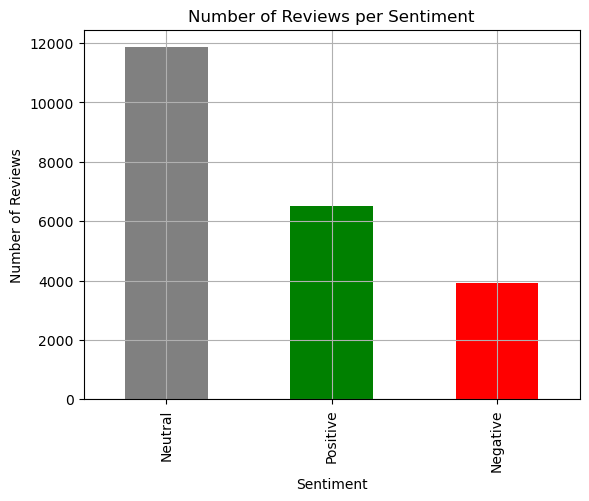

In [73]:
# Number of Reviews per sentiment
colors=['gray', 'green', 'red']
reviews_sentiment['sentiment'].value_counts().plot(kind='bar',grid=True,color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Sentiment');

## Machine Learning for Sentiment Analysis: Predicting McDonald's Reviews

In [74]:
# Split the data into X and  variable y
X = reviews_sentiment['processed_text']
y = reviews_sentiment['sentiment']

In [75]:
# 80% training and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (22285,) (22285,)
Number of rows and columns after splitting dataset:  (17828,) (4457,) (17828,) (4457,)


### Vectorization
I applied vectorization techniques to convert the textual data into a numerical representation suitable for machine learning algorithms. This process involved transforming the reviews into a format that captures their features and patterns effectively.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [77]:
vectorizer = TfidfVectorizer()

In [78]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [79]:
# Choose from different Kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
# Choose from different Gamma:{‘scale’, ‘auto’} or float
clf_svm = SVC(random_state=42)

print(clf_svm)

SVC(random_state=42)


In [81]:
# Creating the model on Training Data
SVM = clf_svm.fit(X_train_tfidf, y_train)
y_pred = SVM.predict(X_test_tfidf)

### Evaluating Model

In [83]:
print('Accuracy: {:.4f}%'.format(accuracy_score(y_test, y_pred) * 100))
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix\n',cm,'\n')
print('Classification Report\n')
print(classification_report(y_test, y_pred))

Accuracy: 78.8423%

Confusion Matrix
 [[ 382  360    7]
 [  97 2228   98]
 [  32  349  904]] 

Classification Report

              precision    recall  f1-score   support

    Negative       0.75      0.51      0.61       749
     Neutral       0.76      0.92      0.83      2423
    Positive       0.90      0.70      0.79      1285

    accuracy                           0.79      4457
   macro avg       0.80      0.71      0.74      4457
weighted avg       0.80      0.79      0.78      4457



### Confusion Matrix

In [87]:
SVM.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

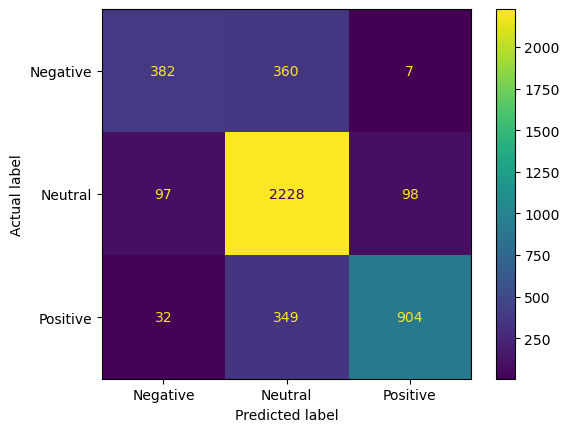

In [88]:
classesMapped = ['Negative', 'Neutral', 'Positive']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)
disp.plot()

plt.ylabel('Actual label')
plt.show()

|              | Predicted Negative | Predicted Neutral | Predicted Positive |
|--------------|---------------------|---------------------|---------------------|
| **Actual Negative** | 382                 | 360                 | 7                   |
| **Actual Neutral**  | 97                  | 2228                | 98                  |
| **Actual Positive** | 32                  | 349                 | 904                 |


# References

https://darigak.medium.com/your-guide-to-folium-markers-b9324fc7d65d

https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717
    
https://python-graph-gallery.com/312-add-markers-on-folium-map/
    
https://python-visualization.github.io/folium/latest/user_guide/ui_elements/icons.html

https://realpython.com/python-folium-web-maps-from-data/

https://towardsdatascience.com/creating-choropleth-maps-with-pythons-folium-library-cfacfb40f56a